# Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = "/Users/charlottelin/Documents/06-2025 Instacart Basket Analysis"

In [3]:
# Importing latest combined customers dataframe
df_ords = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combined_customers_4_9_Final.pkl'))

In [4]:
# Check Output
df_ords.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,Surnam,gender,state,age,date_joined,num_dependents,marital_status,income,merging_status
0,3411074,125899,1,2,20,NaN,27283,3,0,both,...,Brenda,Pennington,Female,Oklahoma,22,2019-03-22,3,married,32609,both
1,582767,131225,6,4,8,28.0,3896,3,1,both,...,Victor,Burke,Male,Alaska,19,2019-05-05,3,living with parents and siblings,50072,both
2,1648217,129928,31,1,20,10.0,37029,47,1,both,...,Adam,Fernandez,Male,Oklahoma,61,2018-03-30,0,divorced/widowed,36163,both
3,492489,93812,17,0,12,8.0,18234,22,1,both,...,Nancy,Gomez,Female,Nevada,50,2017-08-08,0,single,163081,both
4,277503,67925,2,0,13,2.0,41950,3,0,both,...,Rachel,Torres,Female,Texas,25,2019-02-19,2,married,41667,both


# Address PII Information

In [5]:
# Drop Personal Identifiable Information (PII) columns
df_ords_2 = df_ords.drop(columns = ['first_name', 'Surnam'])

In [6]:
# Check output
df_ords_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,ord_regularity_median,frequency_flag,gender,state,age,date_joined,num_dependents,marital_status,income,merging_status
0,3411074,125899,1,2,20,NaN,27283,3,0,both,...,5.0,Frequent customer,Female,Oklahoma,22,2019-03-22,3,married,32609,both
1,582767,131225,6,4,8,28.0,3896,3,1,both,...,28.0,Non-frequent customer,Male,Alaska,19,2019-05-05,3,living with parents and siblings,50072,both
2,1648217,129928,31,1,20,10.0,37029,47,1,both,...,7.0,Frequent customer,Male,Oklahoma,61,2018-03-30,0,divorced/widowed,36163,both
3,492489,93812,17,0,12,8.0,18234,22,1,both,...,7.0,Frequent customer,Female,Nevada,50,2017-08-08,0,single,163081,both
4,277503,67925,2,0,13,2.0,41950,3,0,both,...,19.0,Regular customer,Female,Texas,25,2019-02-19,2,married,41667,both


# Add U.S. Regional Geographical Information to the Analysis

In [7]:
# Assign U.S. Census Bureau Region Information
def get_region(state):
    northeast = [
        'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
        'New Jersey', 'New York', 'Pennsylvania'
    ]
    midwest = [
        'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
        'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
    ]
    south = [
        'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
        'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
        'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
    ]
    west = [
        'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
        'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
    ]

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [8]:
# Apply Region Information to Dataframe
df_ords_2['region'] = df_ords_2['state'].apply(get_region)

In [9]:
# Investigate for spending differences across region
spending_by_region = pd.crosstab(df_ords_2['region'], df_ords_2['spending_flag'])
print(spending_by_region)

spending_flag  High spender  Low spender
region                                  
Midwest                9067      2335758
Northeast              5759      1761299
South                 12676      3317043
West                   9606      2548792


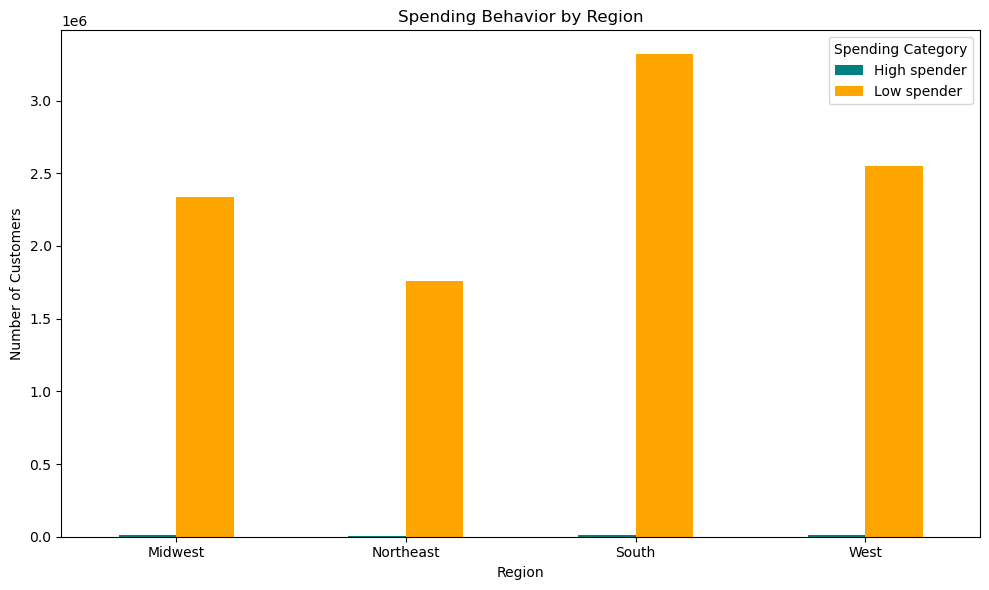

In [10]:
# Plot spending by regional in a clustered column chart
spending_by_region = spending_by_region.plot(kind='bar', figsize=(10, 6), color=['teal', 'orange'])

# Chart details
plt.title('Spending Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Spending Category')
plt.tight_layout()

In [11]:
# Export
spending_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_by_region.png'))

### Observation: Across all regions, low spenders dominate the customer base. The South has the largest customer base for both low and high spenders, while the Northeast has the smallest customer base. 

# Create Exclusion for Low-Spending Customers

In [12]:
#Creating an exclusion flag: Low-activity customers = max_order < 5 ; High-activity customer = max_order >=5

activity_customer=[]

for value in df_ords_2['max_order']:
    if value <5:
        activity_customer.append('Low-activity Customer')
    elif value >=5:
        activity_customer.append('High-activity Customer')
    else: activity_customer.append('Not enough information')
df_ords_2['activity_customer_level']=activity_customer

In [13]:
# Check output
df_ords_2['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    9554746
Low-activity Customer      445254
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Activity Level')

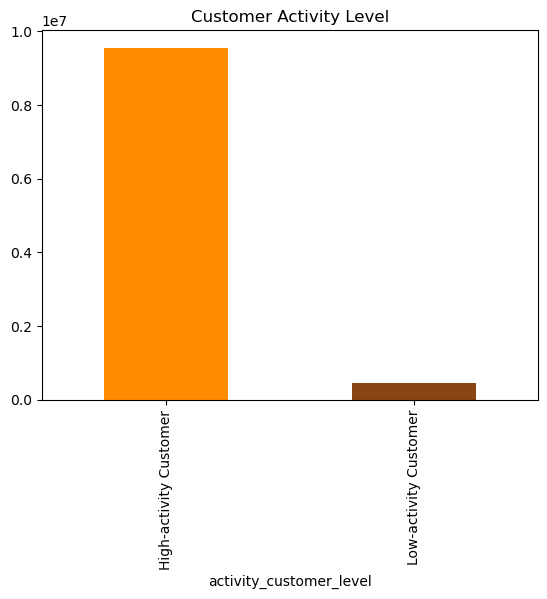

In [14]:
# Demonstrate the results in a bar chart
bar = df_ords_2['activity_customer_level'].value_counts().plot.bar(color =['darkorange', 'saddlebrown',])

plt.title('Customer Activity Level')

In [15]:
# Export
bar.figure.savefig(os.path.join(path,  '04 Analysis','Visualizations', 'customer_activity_level.png'), bbox_inches='tight')

In [16]:
# Exclude low-activity customers by subsetting a new df for this group

low_activity_cust = df_ords_2[df_ords_2['activity_customer_level']=='Low-activity Customer']

In [17]:
# Export the low-activity customers pickle
low_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [18]:
# Create a new subset only for the high-activity customers 
high_activity_cust = df_ords_2[df_ords_2['activity_customer_level']=='High-activity Customer']

In [19]:
# Export the high-activity customers pickle
high_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [20]:
# Check output
df_ords_2[['age','income','num_dependents']].describe()

,age,income,num_dependents
count,1.000000e+07,1.000000e+07,1.000000e+07
mean,4.946186e+01,9.945108e+04,1.501657e+00
std,1.848608e+01,4.314146e+04,1.118888e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.698800e+04,1.000000e+00
50%,4.900000e+01,9.661000e+04,2.000000e+00
75%,6.500000e+01,1.279210e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


### Observations: 
- High-activity customers make the an overwhelming majority amongst the customer base.
- The average customer age is 49.5 years old, ranging from 18 to 81; this indicates a mature customer based likely representing families.
- The average income is $94,500 but with some high earners in the customer base.
- The average number of dependents is 1.5, which is another indication that families having a strong representation.
- Instacart appears to have nurtured a large group of loyal, family-sized, customer based. Targeted marketing towards family while activiting low-activity buyers can be a balanced strategy moving forward.

# Customer Age Profiling

In [21]:
# Create Age Groups
age_groups=[]

for value in df_ords_2['age']:
    if value <33:
        age_groups.append('Young adult')
    elif value >=33 and value <49:
        age_groups.append('Adult')
    elif  value >=49 and value < 65:
        age_groups.append('Older adult')
    elif value >=65:
        age_groups.append('Senior')
    else: age_groups.append('Not enough information')
df_ords_2['age_group']=age_groups

In [22]:
# Check output
df_ords_2['age_group'].value_counts(dropna= False)

age_group
Senior         2646713
Adult          2505499
Older adult    2494067
Young adult    2353721
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Distribution by Age Group')

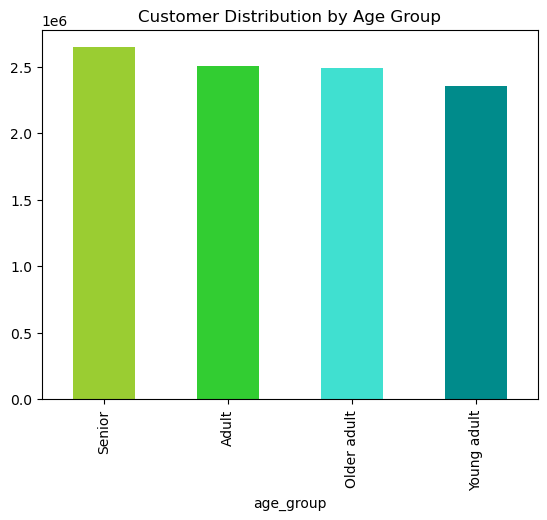

In [23]:
# Visualize the age groups in a bar chart
bar2 = df_ords_2['age_group'].value_counts().plot.bar(color =['yellowgreen', 'limegreen', 'turquoise', 'darkcyan'])

plt.title('Customer Distribution by Age Group')

In [24]:
# Export
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups.png'), bbox_inches='tight')

In [25]:
# Check customer income profiling output
df_ords_2['income'].describe()

count    1.000000e+07
mean     9.945108e+04
std      4.314146e+04
min      2.590300e+04
25%      6.698800e+04
50%      9.661000e+04
75%      1.279210e+05
max      5.939010e+05
Name: income, dtype: float64

# Further Customer Profile Visualizations

## Income Profiling

In [26]:
# Create Income Brackets
income_bracket=[]

for value in df_ords_2['income']:
    if value <96608:
        income_bracket.append('Low Income Customer')
    elif value >=96608 and value <127876:
        income_bracket.append('Middle Income Customer')
    elif  value >=127876:
        income_bracket.append('High Income Customer')
    else: income_bracket.append('Not enough information')
df_ords_2['Income_bracket']=income_bracket

In [27]:
# Check Output
df_ords_2['Income_bracket'].value_counts(dropna= False)

Income_bracket
Low Income Customer       4999313
High Income Customer      2502225
Middle Income Customer    2498462
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Income Brackets')

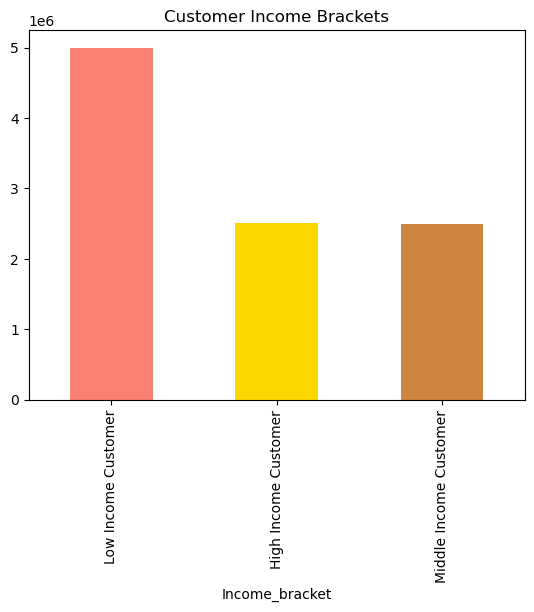

In [28]:
# Visualize income brackets in a bar chart
bar3 = df_ords_2['Income_bracket'].value_counts().plot.bar(color =['salmon', 'gold', 'peru'])
plt.title('Customer Income Brackets')

In [29]:
# Export
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_brackets.png'), bbox_inches='tight')

## Dependents Profiling

In [30]:
df_ords_2['num_dependents'].describe()

count    1.000000e+07
mean     1.501657e+00
std      1.118888e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_dependents, dtype: float64

In [31]:
# Create dependent status groups
dependents=[]

for value in df_ords_2['num_dependents']:
    if value <1:
       dependents.append('Single')
    elif value >=1:
        dependents.append('Parent')
    
    else: dependents.append('Not enough information')
df_ords_2['parent_status']=dependents

In [32]:
# Check output
df_ords_2['parent_status'].value_counts(dropna= False)

parent_status
Parent    7500409
Single    2499591
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer by Dependent Status')

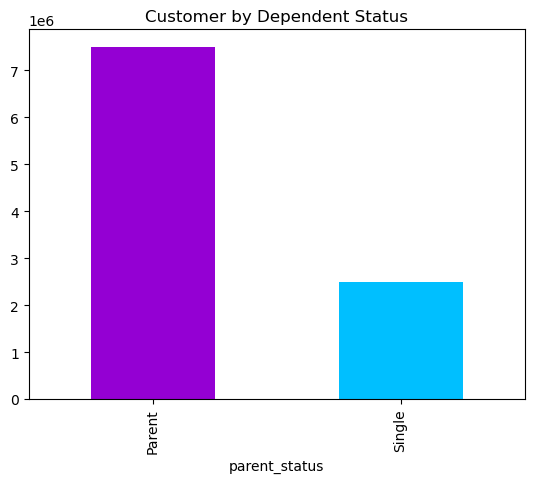

In [33]:
# Visualize the dependent status groups
bar4 = df_ords_2['parent_status'].value_counts().plot.bar(color =['darkviolet', 'deepskyblue'])
plt.title('Customer by Dependent Status')

In [34]:
# Export
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_status.png'), bbox_inches='tight')

In [35]:
# Create a cross-tabulation of income brackets and dependent status
income_parent_ct = pd.crosstab(df_ords_2['Income_bracket'], df_ords_2['parent_status'])
print(income_parent_ct)

parent_status            Parent   Single
Income_bracket                          
High Income Customer    1874487   627738
Low Income Customer     3756425  1242888
Middle Income Customer  1869497   628965


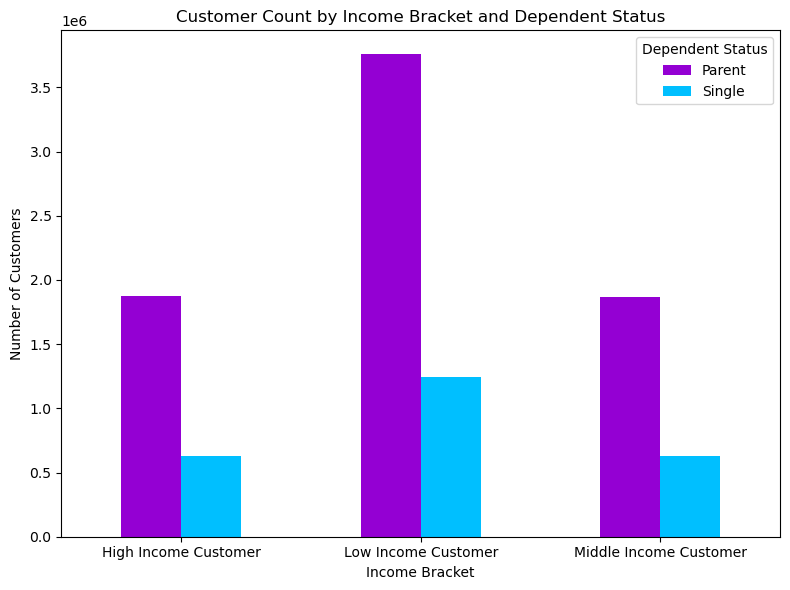

In [36]:
# Visualize customer count by both income and dependent status
bar5 = income_parent_ct.plot(kind='bar', figsize=(8, 6), color=['darkviolet', 'deepskyblue'])

# Chart formatting
plt.title('Customer Count by Income Bracket and Dependent Status')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Dependent Status')
plt.tight_layout()
plt.show()

In [37]:
# Export
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers by income and dependents.png'), bbox_inches='tight')

In [38]:
# Double check dataframe columns
print(df_ords_2.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend_user', 'spending_flag', 'ord_regularity_median',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_dependents', 'marital_status', 'income', 'merging_status',
       'region', 'activity_customer_level', 'age_group', 'Income_bracket',
       'parent_status'],
      dtype='object')


# Customer Profile Aggregation for Usage Frequency & Expenditure

In [39]:
# Create aggregation
df_agg = df_ords_2.groupby('Income_bracket')['prices'].agg(['max', 'mean', 'min'])

In [40]:
# Check output
df_agg

,max,mean,min
Income_bracket,,,
High Income Customer,25.0,7.955138,1.0
Low Income Customer,25.0,7.620470,1.0
Middle Income Customer,25.0,7.962928,1.0


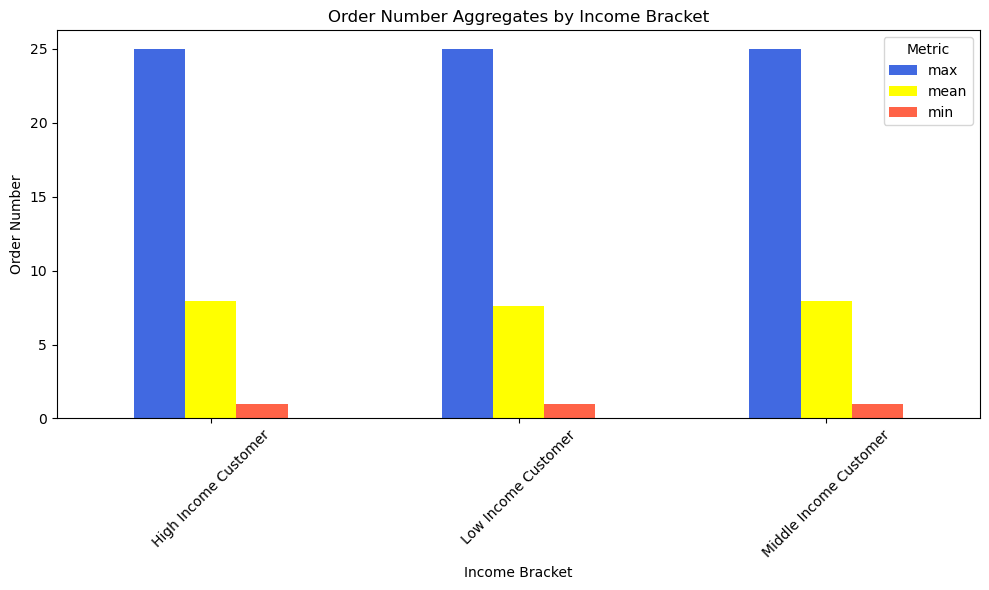

In [41]:
# Visualize aggregation
bar6 = df_agg[['max', 'mean', 'min']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['royalblue', 'yellow', 'tomato']
)

# Add titles and labels
plt.title('Order Number Aggregates by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Order Number')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [42]:
# Export
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order by income.png'), bbox_inches='tight')

### Observation: 
- The average spend per order is remarkably consistent across income brackets. This suggests that order-level pricing strategies and product mix appeal are broadly effective across all customer segments — including low-, middle-, and high-income customers.
- However, it is worth noting that this dataset is a subset from the original, which may have skewed the data in some way, especially since the assumption is that higher income would lead to higher purchasing frequency.
- I also checked across the "avg_spend_user", and found more variation between maximum and minimum spending, but the average is still very similar across groups.

# Regions & Departments Customer Profiling

### I chose the low-income parents group for this profile comparison.

In [43]:
# Create new subset
low_income_parents = df_ords_2[(df_ords_2['parent_status'] == 'Parent') & (df_ords_2['Income_bracket'] == 'Low Income Customer')]

In [44]:
# Check products
product_counts = low_income_parents['product_name'].value_counts(dropna=False)

In [45]:
# Narrow products to top 15
Top_15_product_count = product_counts.head(15)

Text(0, 0.5, 'Count')

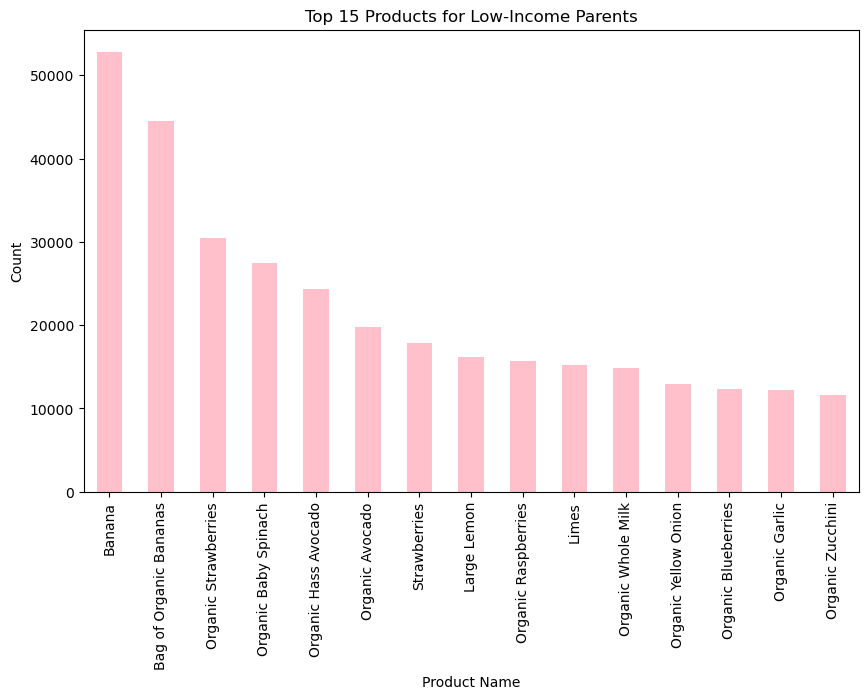

In [46]:
# Visulize the top 15 products for low-income parents
bar7 = plt.figure(figsize=(10, 6))
Top_15_product_count.plot(kind='bar', color=['pink'])

# Add labels and title
plt.title('Top 15 Products for Low-Income Parents')
plt.xlabel('Product Name')
plt.ylabel('Count')

In [47]:
# Export
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top 15 products for low income parents.png'), bbox_inches='tight')

### Observation: The bar chart shows the top 15 products most purchased by the low-income parents group. This is a notable target marketing highlight to help Instacart focus on promoting these products and make sure inventory is adequate for the demand. 

In [48]:
# Assigning new columns to various grocery departments
#Adding new column with names of the department_id

department_name = []

for value in df_ords_2['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10: 
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


df_ords_2['department_name'] = department_name

([<matplotlib.axis.YTick at 0x10dec0440>,
 [Text(0, 0, '0'),
  Text(0, 1000000, '1000000'),
  Text(0, 2000000, '2000000'),
  Text(0, 3000000, '3000000'),
  Text(0, 4000000, '4000000')])

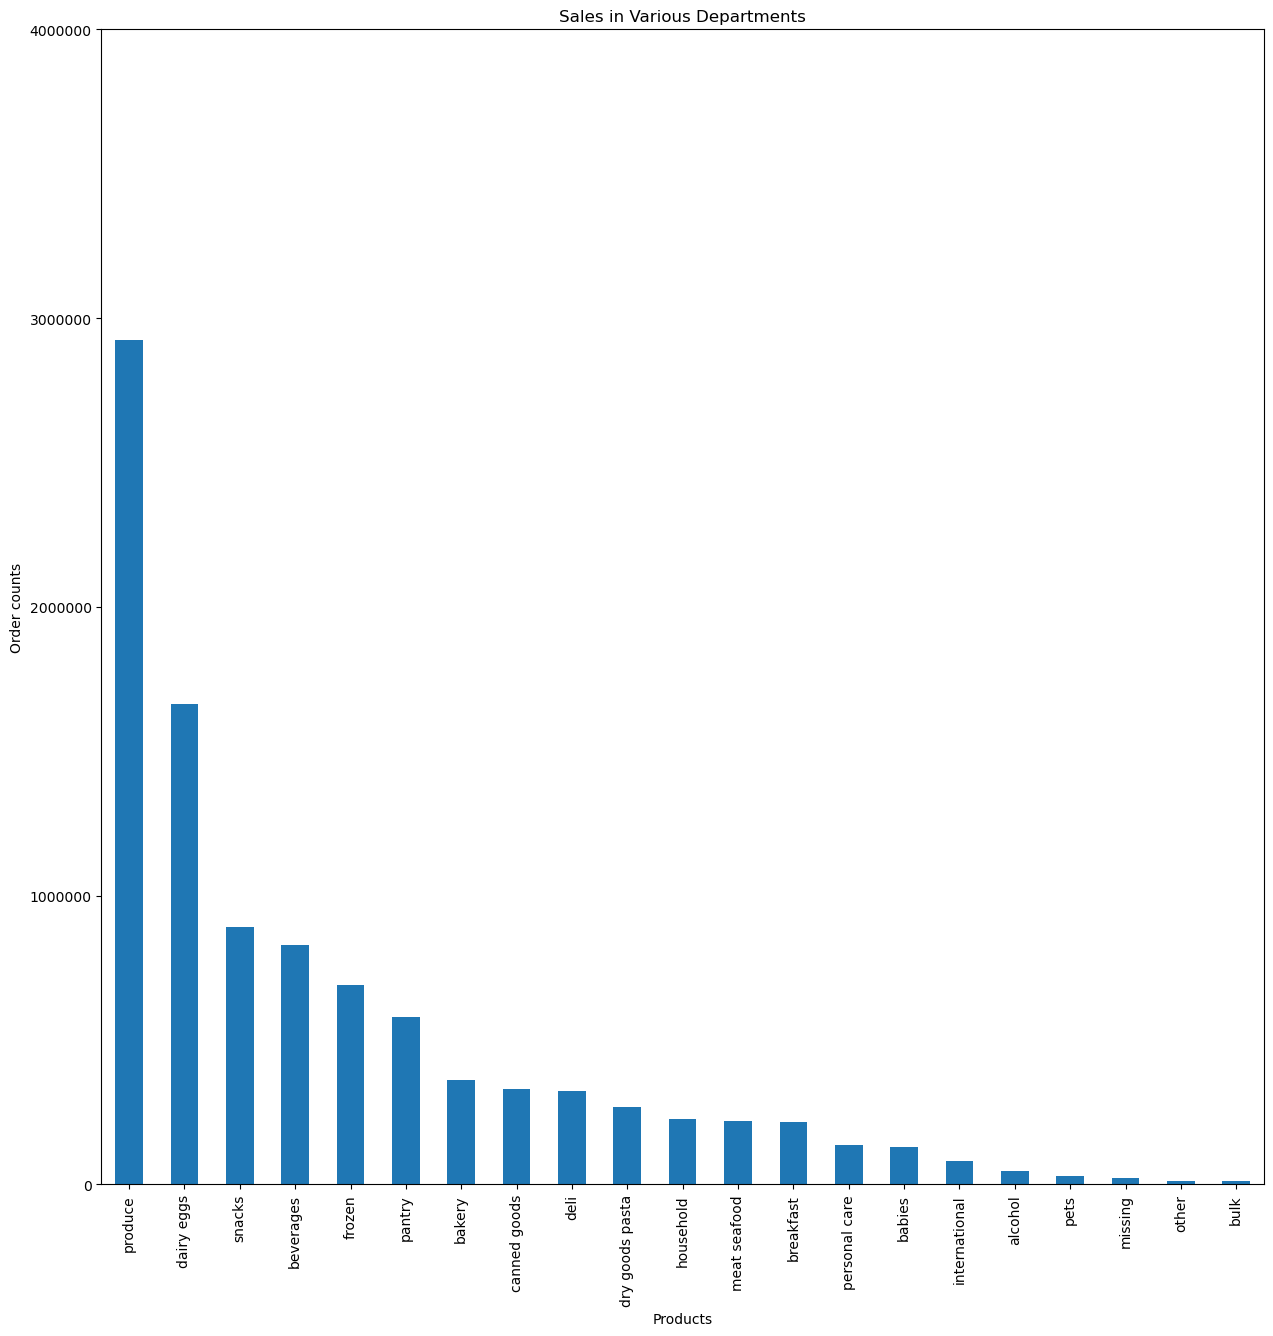

In [50]:
# Visualize sales across grocery departments

bar8 = plt.figure(figsize=(15, 15))

# Calculate the counts and sort by value (descending)
department_counts = df_ords_2['department_name'].value_counts().sort_values(ascending=False)

# Plot the bar chart with the sorted counts
department_counts.plot.bar()

# Add title and labels
plt.title('Sales in Various Departments')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,5000000,1000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,5000000,1000000)])

In [51]:
# Export
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales Across Deparments.png'), bbox_inches='tight')

# Export Final Pickle

In [53]:
df_ords_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_2.pkl'))